In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pickle
from utils import exp
from itertools import chain
from msd_lib import MSD
plt.style.use("seaborn")
sns.set_context("paper", font_scale=2)  
import matplotlib as mpl



/users/christofor.eseroglou/.conda/envs/chris/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mpl.rcParams['font.family']='Nunito'
mpl.rcParams['font.size']=18
mpl.rcParams['axes.linewidth']=2
mpl.rcParams['axes.spines.top']=False
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['ytick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['font.size']=18

In [3]:
data = pd.read_csv('../catalog.csv')
data = data[(data['N']==100_000)&(data['kT']>0.9)]

In [8]:
# def run(data):
#     results = {}
#     for ide in tqdm(list(data['id'])):
#         obj = MSD(exp(ide))
#         obj.calc_msd()
#         results[ide]=obj.msd
#     return results

# RES = run(data)

# with open('final_msd', 'wb') as f:
#     pickle.dump(RES, f)

  0%|          | 0/25 [00:00<?, ?it/s]/users/christofor.eseroglou/.conda/envs/chris/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'initial_coords' of function 'fill_row'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "msd_lib.py", line 40:
@njit
def fill_row(initial_frames,REAL_FRAME, j_th_coord,initial_coords, matrix):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
100%|██████████| 25/25 [28:35<00:00, 68.60s/it]


In [4]:
with open('final_msd', 'rb') as f:
    RES = pickle.load(f)

In [5]:
panel_a = list(data[(data['intg']=='langevin')&(data['L']==46.4)]['id'])
panel_b = list(data[(data['intg']=='langevin')&(data['L']==69.3)]['id'])
panel_c = list(data[(data['intg']=='langevin')&(data['L']==100.0)]['id'])
panel_d = list(data[(data['intg']=='dpd')&(data['L']==46.4)]['id'])
panel_e = list(data[(data['intg']=='dpd')&(data['L']==69.3)]['id'])
panel_f = list(data[(data['intg']=='dpd')&(data['L']==100.0)]['id'])
panel_g = list(data[(data['intg']=='brownian')&(data['L']==46.4)]['id'])
panel_h = list(data[(data['intg']=='brownian')&(data['L']==69.3)]['id'])
panel_i = list(data[(data['intg']=='brownian')&(data['L']==100.0)]['id'])

In [6]:
def get_label(ide, char):
    return list(data[data['id']==ide][char])[0]

Text(0.5, 0.98, 'L=46.4')

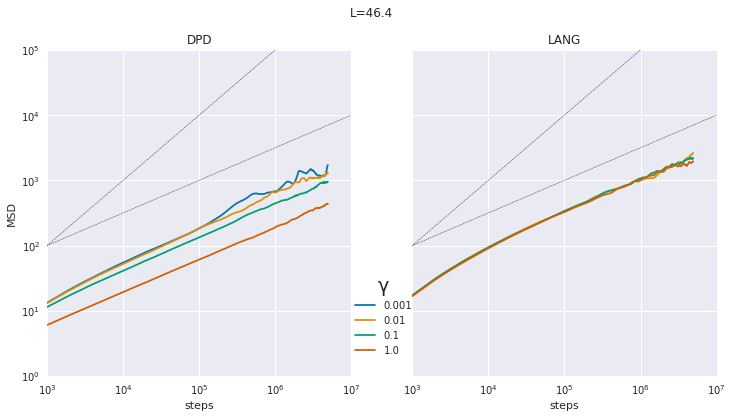

In [7]:
plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6), sharey = True)
axes = (ax1,ax2)
Titles=['DPD','LANG']


hue_params = [0.001,0.01,0.1,1,10]
colors = sns.color_palette('colorblind')[:len(hue_params)]
color_dic = dict(zip(hue_params,colors))


x = 1e3*np.arange(1,len(RES[3000])+1)

ax1.axline((1e3,1e2),slope=1, color='k',linestyle='dashed',linewidth=0.4)
ax2.axline((1e3,1e2),slope=1, color='k',linestyle='dashed',linewidth=0.4)
ax1.axline((1e3,1e2),slope=0.5, color='k',linestyle='dashed',linewidth=0.4)
ax2.axline((1e3,1e2),slope=0.5, color='k',linestyle='dashed',linewidth=0.4)
for i,panel in enumerate([panel_a, panel_e]):
    for ide in panel:
        gamma = get_label(ide, 'gamma')
        axes[i].plot(x, RES[ide], linestyle='solid', color = color_dic[gamma]  , label = gamma)
    
        
    axes[i].set(title = Titles[i],
                xscale = 'log', yscale='log', xlim =[1e3,1e7], ylim = [1,1e5])
    

ax1.legend(title = 'γ', loc= (1,0.05))                                 
ax1.set(ylabel = 'MSD', xlabel='steps')
ax2.set(xlabel='steps')
fig.suptitle('L=46.4')

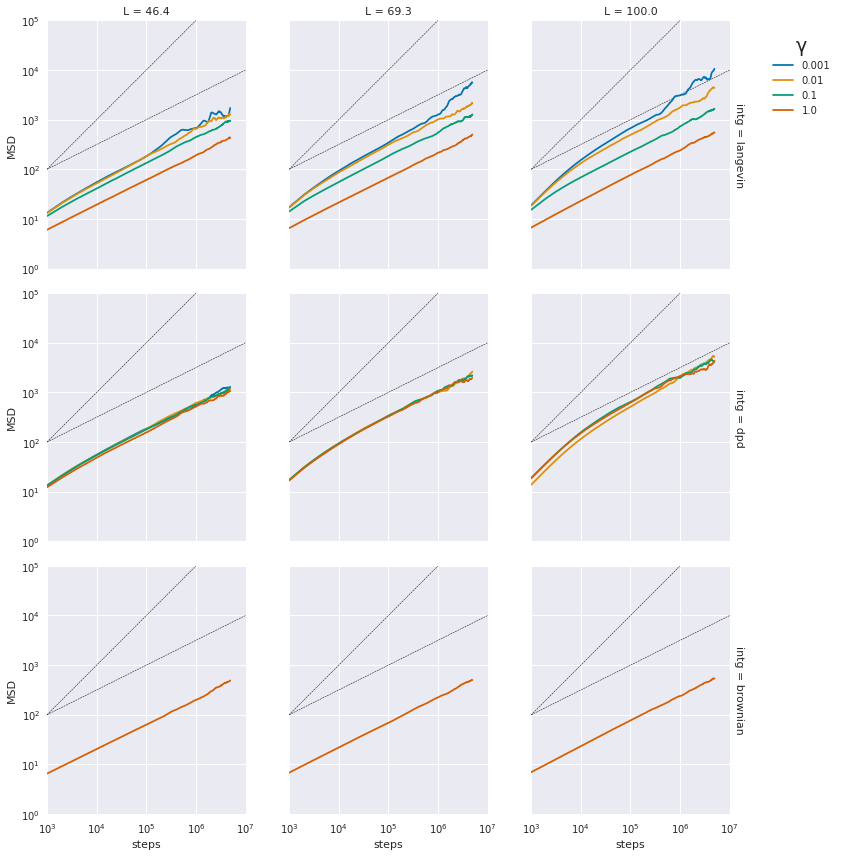

In [8]:
g = sns.FacetGrid(data, row='intg',col='L', margin_titles=True, height=4, aspect = 1)
axes = g.axes
axes = list(chain(*axes))

hue_params = [0.001,0.01,0.1,1,10]
colors = sns.color_palette('colorblind')[:len(hue_params)]
color_dic = dict(zip(hue_params,colors))

x = 1e3*np.arange(1,len(RES[3000])+1)

for i,panel in enumerate([panel_a, panel_b, panel_c, panel_d, panel_e, panel_f, panel_g, panel_h, panel_i ]):
    axes[i].axline((1e3,1e2),slope=1, color='k', linestyle='dashed', linewidth=0.5)
    axes[i].axline((1e3,1e2),slope=0.5, color='k', linestyle='dashed', linewidth=0.5)
    for ide in panel:
        gamma = get_label(ide, 'gamma')
        axes[i].plot(x, RES[ide], linestyle='solid', color = color_dic[gamma],  label = gamma)
        
for i in range(len(axes)):        
    axes[i].set(xscale = 'log',yscale='log',xlabel='steps',ylabel='MSD', xlim =[1e3,1e7], ylim = [1,1e5], aspect=1.0)
axes[2].legend(title='γ', loc=(1.2,0.6))

plt.tight_layout()